# Students Grades Regression

### Importing needed libraries

In [26]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.metrics import r2_score


%matplotlib inline

### Reading the data

You can find the dataset [here](https://www.kaggle.com/datasets/aditeloo/student-study-hour-v2)

In [27]:
Student_Dataset= pd.read_csv("Student Study Hour V2.csv")

In [90]:
Student_Dataset.head(10) # Displaying the first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Get to know the data

In [29]:
Student_Dataset.shape # Number of rows & columns

(28, 2)

In [30]:
Student_Dataset.info()# Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   28 non-null     float64
 1   Scores  28 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 576.0 bytes


In [31]:
Student_Dataset.describe() # Mathmatical values to summerize the data

,Hours,Scores
count,28.000000,28.000000
mean,4.832143,49.964286
std,2.530562,25.041421
min,1.100000,17.000000
25%,2.675000,29.250000
50%,4.650000,44.500000
75%,7.025000,70.500000
max,9.200000,95.000000


### Insure the data is pure

In [32]:
Student_Dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [33]:
Student_Dataset.duplicated().sum()

0

### Visualization

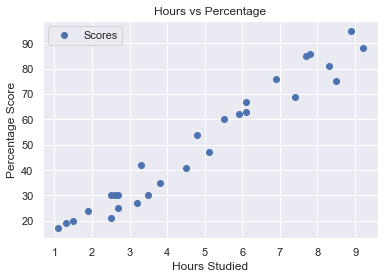

In [34]:
Student_Dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

### Splitting the data

In [35]:
X= np.reshape(Student_Dataset.Hours.values,(-1,1))# Storing the independant value in a variable
y= Student_Dataset.Scores.values # Storing the dependant value in a variable 

In [36]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8],
       [1.3],
       [2.6],
       [6.1]])

In [37]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86, 19, 30, 63])

<img src="trainvaltest.png" width="400"/>

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Building models


#### Linear Regression

<img src="Regression.png" width="600"/>

In [65]:
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
reg_train=regressor.score(X_train,y_train)
print('Accuracy score for training set:' , reg_train)

Accuracy score for training set: 0.9615787057701657


#### K-Nearest Neighbors (KNN)

<img src="KNN.png" width="300"/>

In [67]:
KNN= KNeighborsClassifier(n_neighbors=2)  
KNN.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=2)

In [68]:
KNN_train=KNN.score(X_train,y_train)
print('Accuracy score for training set:' , KNN_train)

Accuracy score for training set: 0.631578947368421


#### Comparison

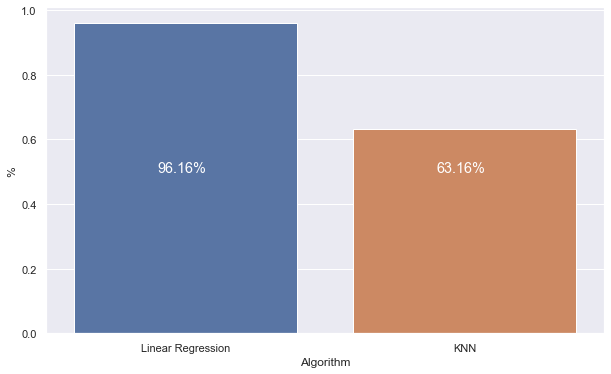

In [89]:
methods = ["Linear Regression","KNN"]
accuracy = [reg_train,KNN_train]

sns.set()
plt.figure(figsize=(10,6))
plt.ylabel("%")
plt.xlabel("Algorithm")
sns.barplot(x=methods, y=accuracy, palette="deep")

for line in range(len(methods)):
     plt.text(line-0.10, # x
              0.50, # y
             "{:.2f}%".format(accuracy[line]*100),
             horizontalalignment='left',
              size='large',
             color="white",
             )        
plt.show()

#### Plotting the line of regression

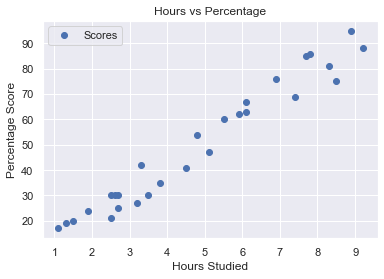

In [70]:
Student_Dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [71]:
# To retrieve the intercept and slope.
print(regressor.intercept_)
print(regressor.coef_)

1.8750073490504988
[9.914898]


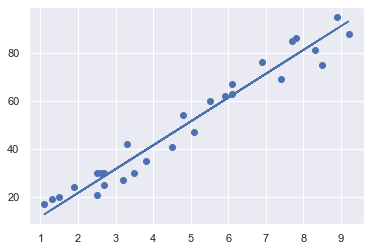

In [72]:
# Plotting the line of regression

line= regressor.coef_*X+regressor.intercept_

#plotting the test data

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

#### Prediction

In [73]:
y_pred= regressor.predict(X_test)

In [74]:
y_pred_reg = pd.DataFrame({'Expected Score':y_test, 'Predicted':y_pred })
y_pred_reg['# of Hours']=X_test
y_pred_reg

,Expected Score,Predicted,# of Hours
0,86,79.211212,7.8
1,24,20.713314,1.9
2,69,75.245253,7.4
3,30,28.645232,2.7
4,17,12.781395,1.1
5,75,86.151640,8.5
6,35,39.551620,3.8
7,85,78.219722,7.7
8,54,49.466518,4.8


In [75]:
print('Accuracy score for the actual y and predicted y:' , r2_score(y_test,y_pred))

Accuracy score for the actual y and predicted y: 0.9440193372314424


#### What will be the predicted score if a student studies for 9.25 hrs/ day?


In [81]:
hours = 9.25
test= np.array([hours])
test= test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.58781380445646
